In [79]:
import tensorflow as tf
import keras as ks
from keras import models
from keras import metrics
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection

In [2]:
data=pd.read_csv('/content/AAPL.csv').round(2)

In [126]:
puredata=pd.read_csv('/content/AAPL.csv').round(2)

In [53]:
data=data.sample(frac=1)
data

,Date,High,Low,Close,Adj Close,Volume,Open,Interest,Currency,Inflation,Month,Day
1559,1999-06-04,0.43,0.42,0.43,0.37,368681600,0.43,5.90,0.63,2.0,6,4
4960,2012-12-10,19.23,18.63,18.92,16.25,630484400,18.75,1.72,0.62,1.7,12,10
7150,2021-08-23,150.19,147.89,149.71,148.40,60131800,148.31,1.28,0.72,5.3,8,23
2621,2003-08-26,0.38,0.36,0.38,0.32,164959200,0.37,4.45,0.63,2.2,8,26
383,1994-10-06,0.33,0.32,0.32,0.27,526915200,0.33,7.74,0.62,2.6,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6861,2020-06-30,91.50,90.00,91.20,89.66,140223200,90.02,0.73,0.80,0.6,6,30
3545,2007-04-30,3.61,3.56,3.56,3.03,616509600,3.57,4.69,0.50,2.6,4,30
2267,2002-04-02,0.43,0.43,0.43,0.37,203795200,0.43,5.21,0.69,1.6,4,2
3006,2005-03-08,1.51,1.43,1.45,1.23,1021451200,1.50,4.50,0.53,3.1,3,8


In [54]:
train=data.iloc[:int(0.8*len(data))]
test=data.iloc[int(0.8*len(data)):]

In [5]:
test.to_csv('testing_dataset.csv')
train.to_csv('training_dataset.csv')

In [38]:
def normalize(data):
  mean = data.mean(axis=0,numeric_only=True)
  std = data.std(axis=0,numeric_only=True)
  return (data - mean) / std
train=normalize(data)


In [55]:
train.tail()

,Date,High,Low,Close,Adj Close,Volume,Open,Interest,Currency,Inflation,Month,Day
2164,2001-10-31,0.33,0.31,0.31,0.27,273750400,0.32,4.57,0.69,2.1,10,31
4753,2012-02-13,17.99,17.75,17.95,15.28,517216000,17.84,1.97,0.63,2.9,2,13
4279,2010-03-29,8.35,8.27,8.30,7.06,540744400,8.32,3.73,0.66,2.3,3,29
3673,2007-10-30,6.76,6.60,6.68,5.68,939414000,6.65,4.53,0.49,3.5,10,30
3920,2008-10-22,3.62,3.32,3.46,2.94,2248808800,3.48,3.81,0.59,3.7,10,22


In [56]:
X=train.iloc[:,[1,2,6,7,8,9,10,11]]
X.head()

,High,Low,Open,Interest,Currency,Inflation,Month,Day
1559,0.43,0.42,0.43,5.90,0.63,2.0,6,4
4960,19.23,18.63,18.75,1.72,0.62,1.7,12,10
7150,150.19,147.89,148.31,1.28,0.72,5.3,8,23
2621,0.38,0.36,0.37,4.45,0.63,2.2,8,26
383,0.33,0.32,0.33,7.74,0.62,2.6,10,6


In [57]:
Y=train.iloc[:,3:4]
Y.head()

,Close
1559,0.43
4960,18.92
7150,149.71
2621,0.38
383,0.32


In [58]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [118]:
metric=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError(),metrics.MeanAbsolutePercentageError(),metrics.MeanSquaredLogarithmicError()]
def modelbuild():
    model = models.Sequential()
    model.add(ks.layers.Reshape((1,8,),input_shape=(8,)))
    model.add(ks.layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(1,8,)))

    model.add(ks.layers.Dropout(0.2))
    model.add(ks.layers.LSTM(128,activation='relu'))

    model.add(ks.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=metric)
    return model
model=modelbuild()

In [ ]:
model.summary()

In [121]:
stop = ks.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test),callbacks=[stop])
#training the model

test_loss, rmse, mae, mape, msle = model.evaluate(x_test, y_test, verbose=2)

print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)

Epoch 1/100
152/152 [==============================] - 1s 9ms/step - loss: 16.4962 - root_mean_squared_error: 4.0616 - mean_absolute_error: 1.6896 - mean_absolute_percentage_error: 18.7399 - mean_squared_logarithmic_error: 0.0104 - val_loss: 0.9818 - val_root_mean_squared_error: 0.9909 - val_mean_absolute_error: 0.6086 - val_mean_absolute_percentage_error: 11.6401 - val_mean_squared_logarithmic_error: 0.0027
Epoch 2/100
152/152 [==============================] - 1s 8ms/step - loss: 12.7638 - root_mean_squared_error: 3.5726 - mean_absolute_error: 1.5550 - mean_absolute_percentage_error: 18.0365 - mean_squared_logarithmic_error: 0.0092 - val_loss: 0.3904 - val_root_mean_squared_error: 0.6248 - val_mean_absolute_error: 0.2867 - val_mean_absolute_percentage_error: 8.8013 - val_mean_squared_logarithmic_error: 0.0026
Epoch 3/100
152/152 [==============================] - 1s 8ms/step - loss: 17.6592 - root_mean_squared_error: 4.2023 - mean_absolute_error: 1.7964 - mean_absolute_percentage_err

In [122]:
X=test.iloc[:,[1,2,6,7,8,9,10,11]]
Y=test.iloc[:,3:4]

In [ ]:
X.tail()

In [ ]:
Y.tail()

In [125]:
test_loss, rmse, mae, mape, msle = model.evaluate(X,Y, verbose=1)
print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)
print("Want to save model?")
c=input()
if c=='y':
  ks.Model.save(model,'/content/models')

48/48 [==============================] - 0s 3ms/step - loss: 0.3890 - root_mean_squared_error: 0.6237 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 8.6484 - mean_squared_logarithmic_error: 0.0025

Mean Squared Error:  0.38899433612823486
Root Mean Squared Error:  0.623694121837616
Mean Absolute Error:  0.2778579592704773
Mean Absolute Percentage Error:  8.648374557495117
Mean Squared Logarithmic Error:  0.002522196853533387
Want to save model?
y


237/237 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - root_mean_squared_error: 0.0000e+00 - mean_absolute_error: 0.0000e+00 - mean_absolute_percentage_error: 0.0000e+00 - mean_squared_logarithmic_error: 0.0000e+00
[0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
PX=puredata.iloc[:,[1,2,6,7,8,9,10,11]]
PY=puredata.iloc[:,3:4]
predicted_prices=model.predict(PX)

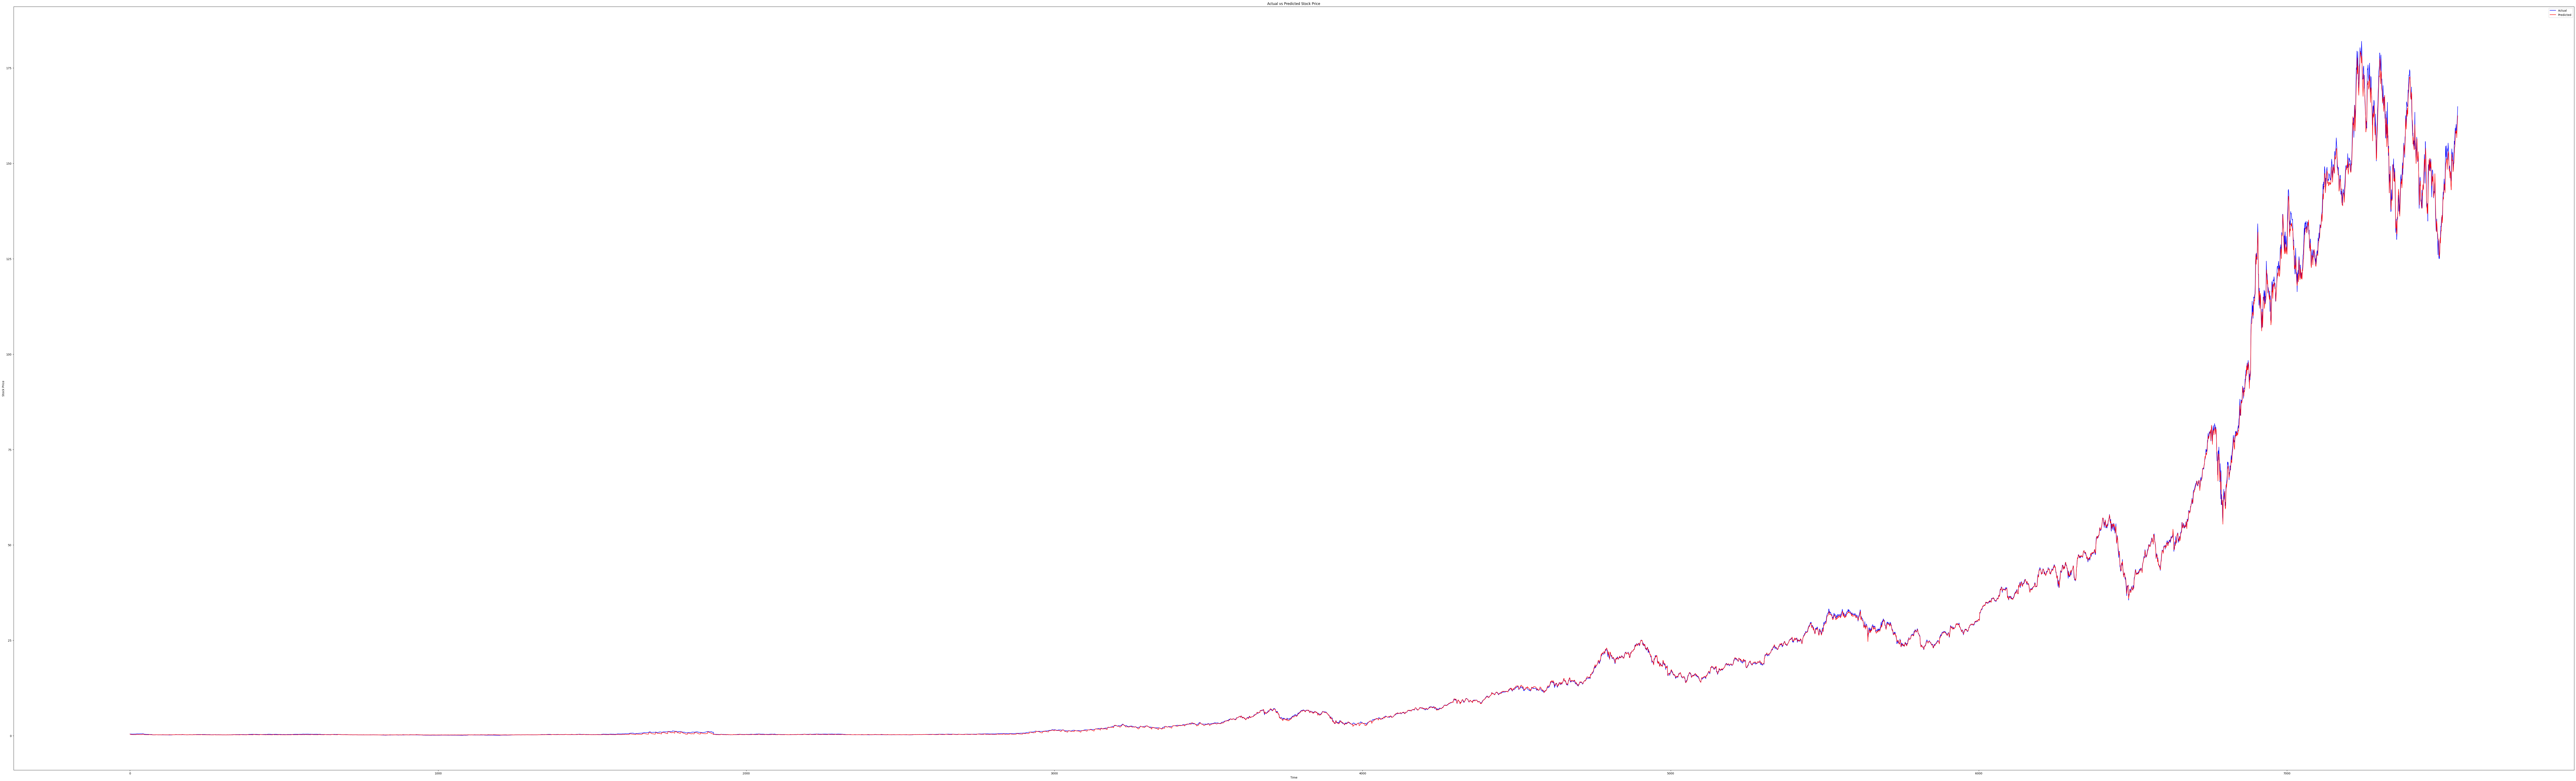

In [155]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(120,48))
plt.plot(PY['Close'], color='blue', label='Actual')
plt.plot(predicted_prices, color='red', label='Predicted')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()

plt.show()